# INVESTIGATION OF THE TMDB MOVIES DATASET

![TMDB Movies](cover-art.webp) 

## Table of Content
- [Introduction](#introduction)
- [Environment Configaturation](#environment-configuration)
- [Data Collection](#data-collection)
- [Data Wrangling Phase](#data-wrangling)
- [Data Cleaning Phase](#data-cleaning)
- [Data Analysis](#data-analysis)
- [Results and Findings](#results-and-findings)
- [References and Resources](#references-and-resources)

### <a id="introduction">Introduction</a>

<a href="https://www.themoviedb.org/about">The Movie Database (TMDB)</a> is a community-built movie and TV databse. In this project, i will investigate a subset of this database using popular python libraries like NumPy, Pandas, Matplotlib and Seaborn, among others, in order to answer the following set of both univariate and bivariate questions:

<strong>Univariate Questions:</strong>
<ol>
    <li>Which year had the highest release of movies?</li>
    <li>Which genre had the highest release of movies?</li>
    <li>Which 10 actors are casted the most?</li>
    <li>Identify the keywords that appear most frequently in movie descriptions.</li>
    <li>Calculate the average popularity for each genre category.</li>
    <li>Calculate the total revenue for each genre category.</li>
    <li>Calculate the average vote average for movies released before the year 2000.</li>
    <li>Perform a time series analysis of movie releases and visualize the trend over the years.</li>
</ol>

<strong>Bivariate Questions:</strong>
<ol>
    <li>Which length (runtime) is suits viewers most based on movie popularity?</li>
    <li>What is the correlation between movies’ budgets and their revenue?</li>
    <li>What is the correlation between average ratings and revenue generated?</li>
</ol>

### <a id="environment-configuration">Environment Configuration</a>
In the section, I import and configure the environmental packages, scripts and global variables needed for the subsequent sections.

In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install wordcloud
!pip3 install matplotlib

<strong>Importation of packages</strong>

In [44]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

<strong>Utility functions</strong>

In [45]:
def annotate_bars_with_numbers(ax, offset=10):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, offset), textcoords='offset points')

In [46]:
def annotate_barsh_with_values(ax, df):
    for i, value in enumerate(df['Total Revenue']):
        ax.text(value, i, f'{value:,}', va='center')

### <a id="data-collection">Data Collection</a>
In this section, I load the raw dataset to investigate into memory - from a CSV file called data.csv. 

In [47]:
dirty_df = pd.read_csv('data.csv')

### <a id="data-wrangling">Data Wrangling</a>
Also called data mungling or data remediation, in this section, I analyse the active raw dataset to fully understand its structural and contextual state. Additionally, I endavour to convert this raw dataset into a useable high quality form. Various tools like Microsoft Excel, Google Sheets, Tabula, Google DataPrep, among others could be used in this phase, but I have decided to use inline python code with libraries such as NumPy and Pandas to accomplish this task.

In [48]:
dirty_df.shape

(10866, 21)

In [49]:
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [50]:
list(dirty_df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [51]:
dirty_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [52]:
dirty_df.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [53]:
dirty_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [54]:
dirty_df.duplicated().sum()

1

In [55]:
dirty_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

<strong>Data Wrangling Phase Report:</strong>

- The dataset has 10,866 rows and 21 columns. 
- All values, even when innapropriate, are either of three data types: int64, float64 and object. 
- The dataset contains 1 row that is a duplicate across all columns.


### <a id="data-cleaning">Data Cleaning</a>

Also called data cleansing or data scrubbing, in this section, i focus on refining the dataset to ensure its accuracy, consistency, and reliability. Actions include but are not limited to dropping duplicate values and invalid entries, replacing null values with appropriate fillers, converting columns to appropriate data types, converting molecular columns into their corresponding atomic columns, among others. Likewise, i'm using inline python code with libraries such as NumPy and Pandas to accomplish this task.

In [56]:
df = dirty_df.copy()

In [57]:
df[df.duplicated(subset='imdb_id',keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000e+00,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000e+00,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000e+00,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000e+00,0.0
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,967000.0
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,967000.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000e+00,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000e+00,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000e+00,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,4.680167e+02,0.0


In [58]:
df.drop_duplicates(subset='imdb_id', keep=False,inplace=True)
df.shape

(10854, 21)

In [59]:
columns_to_drop = ['revenue_adj', 'budget_adj','release_date','vote_count','production_companies','tagline','director','homepage','original_title', 'imdb_id'];
df.drop(columns=columns_to_drop,inplace=True)

df.head(1)

,id,popularity,budget,revenue,cast,keywords,overview,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6.5,2015


In [60]:
df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
cast              76
keywords        1487
overview           3
runtime            0
genres            21
vote_average       0
release_year       0
dtype: int64

In [61]:
df.dropna(inplace=True)

df.isna().sum()

id              0
popularity      0
budget          0
revenue         0
cast            0
keywords        0
overview        0
runtime         0
genres          0
vote_average    0
release_year    0
dtype: int64

In [62]:
df.shape

(9316, 11)

In [63]:
df.head(5)

,id,popularity,budget,revenue,cast,keywords,overview,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,6.3,2015
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,7.3,2015


### <a id="data-analysis">Data Analysis</a>

<strong>Movie releases over the years in descending order</strong>

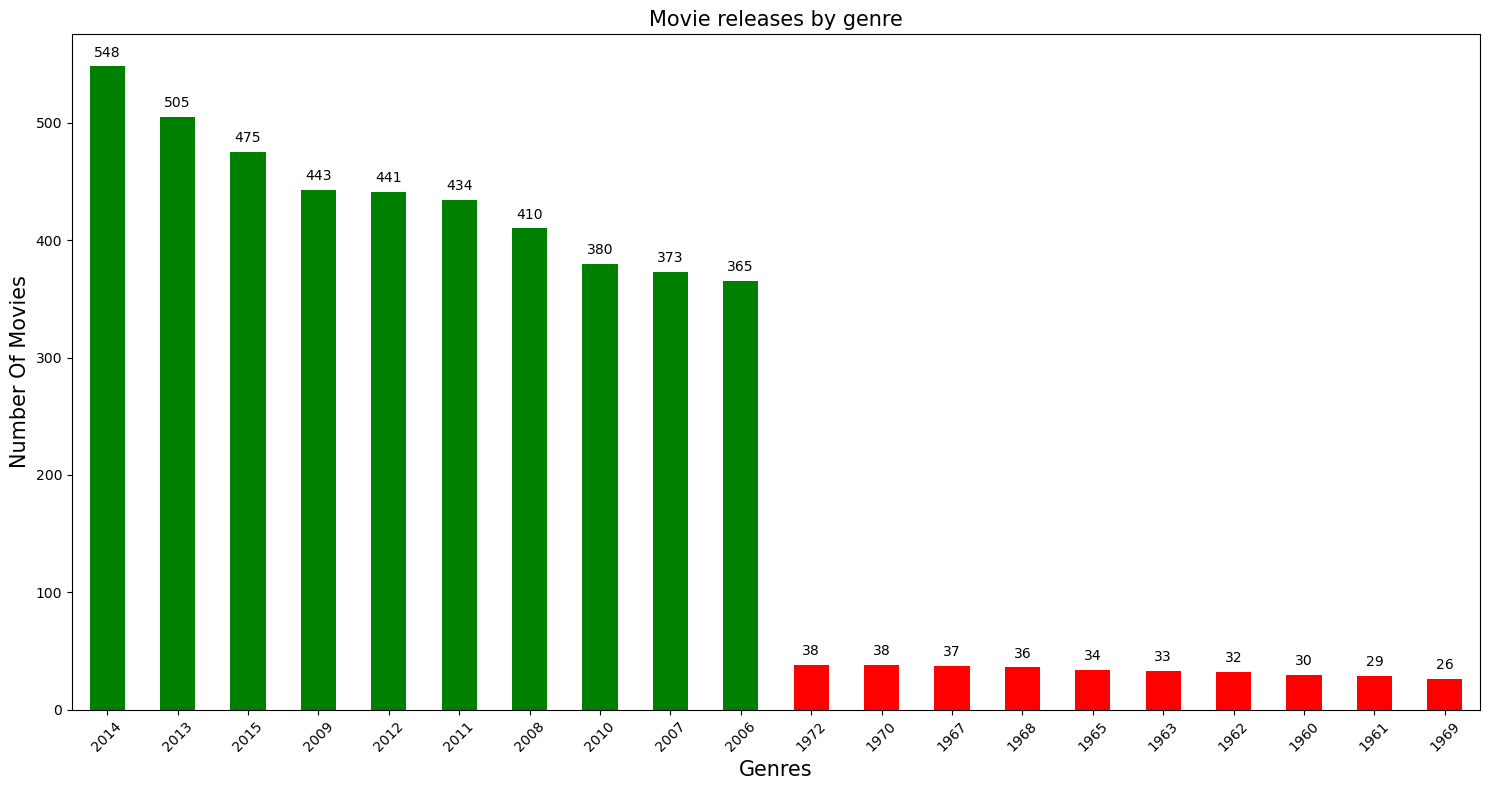

In [64]:
years_with_movie_count=(df.groupby('release_year').count()['id']).sort_values(ascending=False)

plt.figure(figsize=(15, 8))

concatenated_series = pd.concat([years_with_movie_count.iloc[:10], years_with_movie_count.iloc[-10:]])
ax = concatenated_series.plot(kind='bar', color=['green'] * 10 + ['red'] * 10)

annotate_bars_with_numbers(ax)
plt.title("Movie releases by genre", fontsize=15)
plt.xlabel('Genres', fontsize=15)
plt.ylabel("Number Of Movies", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<strong>Movie releases by genre</strong>

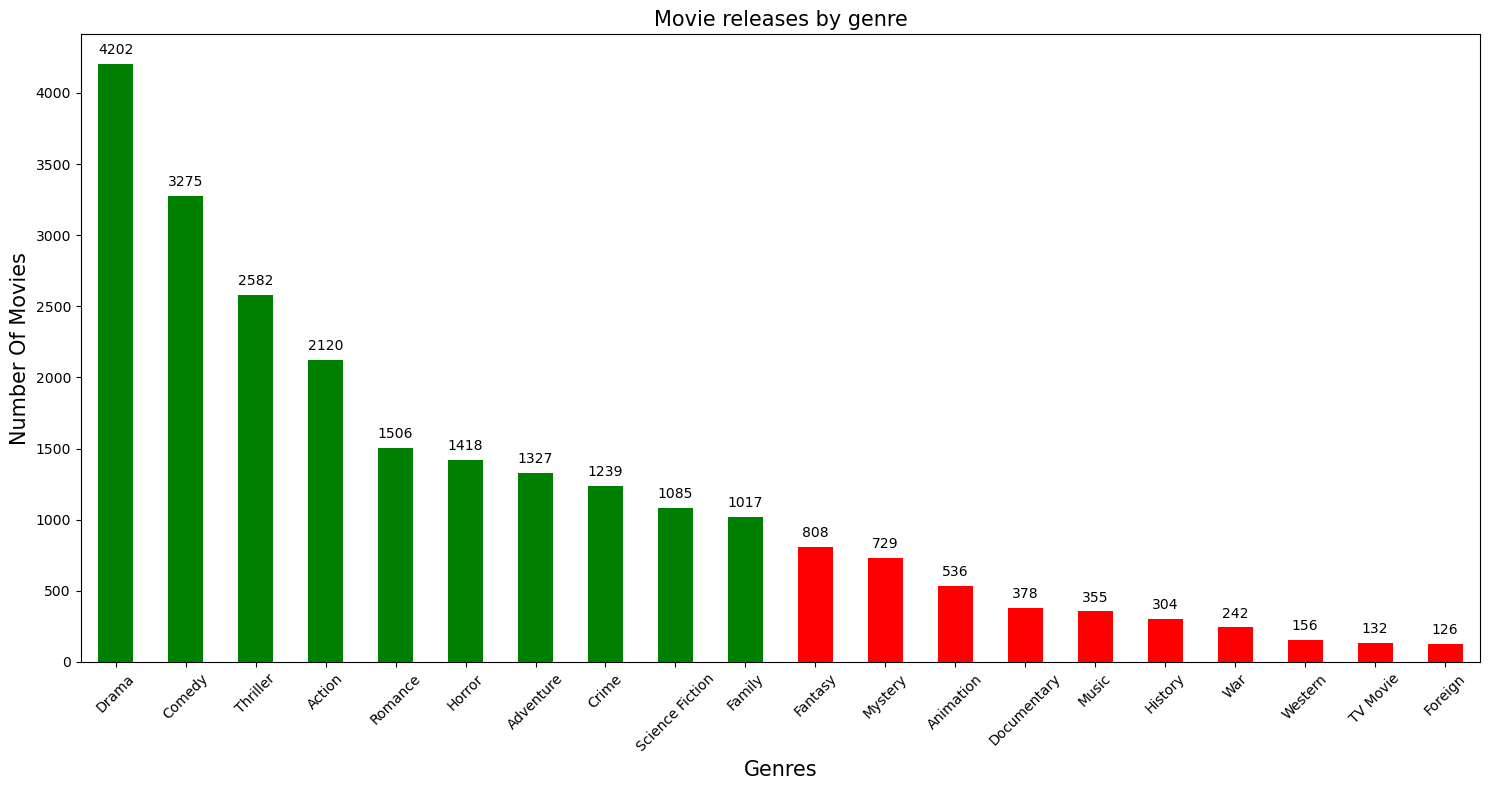

In [65]:
total_genres_appearences = df['genres'].str.cat(sep='|')
genres_count = pd.Series(total_genres_appearences.split('|')).value_counts(ascending=False)

plt.figure(figsize=(15, 8))

concatenated_series = pd.concat([genres_count.iloc[:10], genres_count.iloc[-10:]])
ax = concatenated_series.plot(kind='bar', color=['green'] * 10 + ['red'] * 10)

annotate_bars_with_numbers(ax)
plt.title("Movie releases by genre", fontsize=15)
plt.xlabel('Genres', fontsize=15)
plt.ylabel("Number Of Movies", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<strong>Ranking of actor casting count</strong>

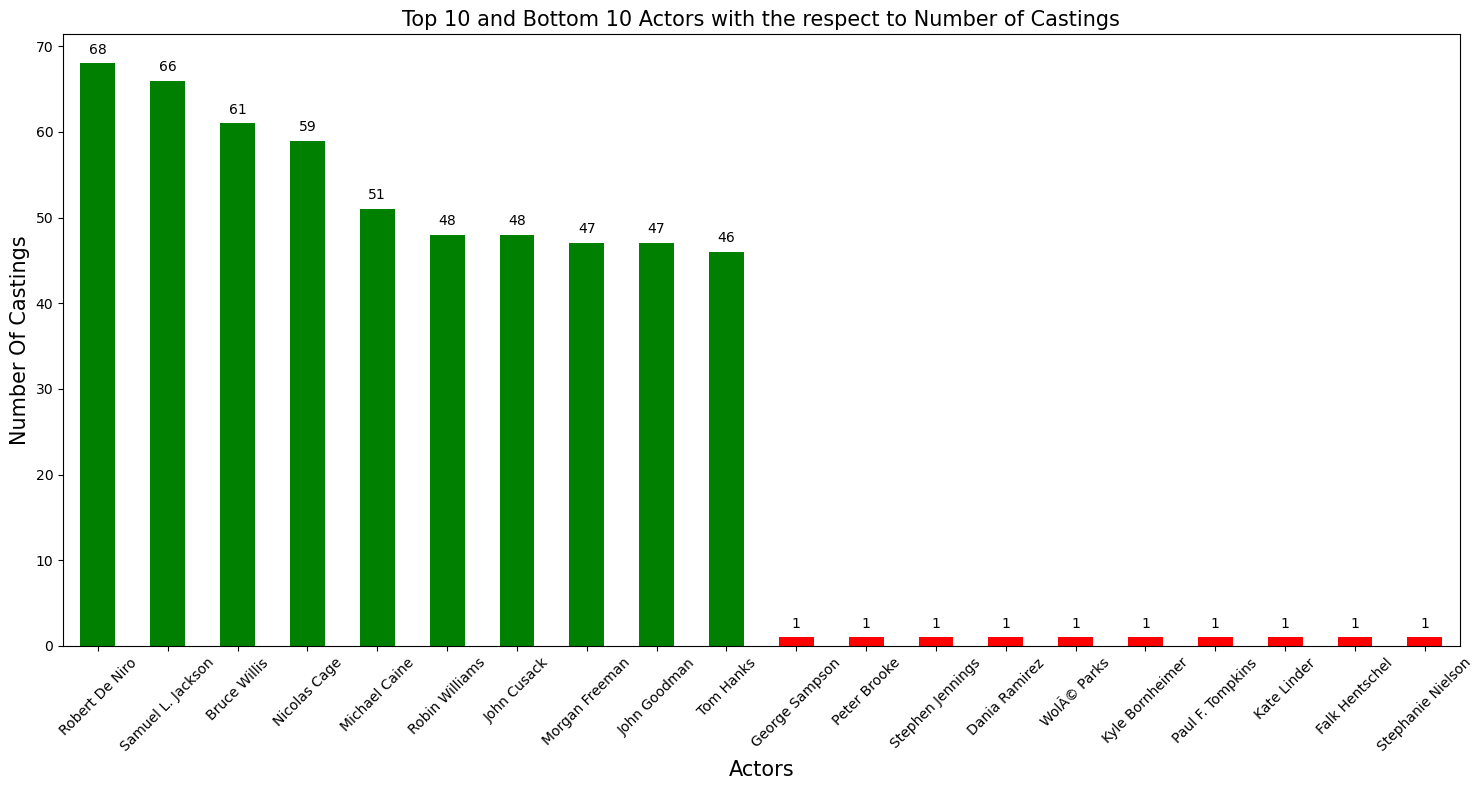

In [66]:
total_actor_appearences = df['cast'].str.cat(sep='|')
actor_count = pd.Series(total_actor_appearences.split('|')).value_counts(ascending=False)

plt.figure(figsize=(15, 8))

concatenated_series = pd.concat([actor_count.iloc[:10], actor_count.iloc[-10:]])
ax = concatenated_series.plot(kind='bar', color=['green'] * 10 + ['red'] * 10)

annotate_bars_with_numbers(ax)

plt.title("Top 10 and Bottom 10 Actors with the respect to Number of Castings", fontsize=15)
plt.xlabel('Actors', fontsize=15)
plt.ylabel("Number Of Castings", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<strong>Frequency of keywords in movie descriptions.</strong>

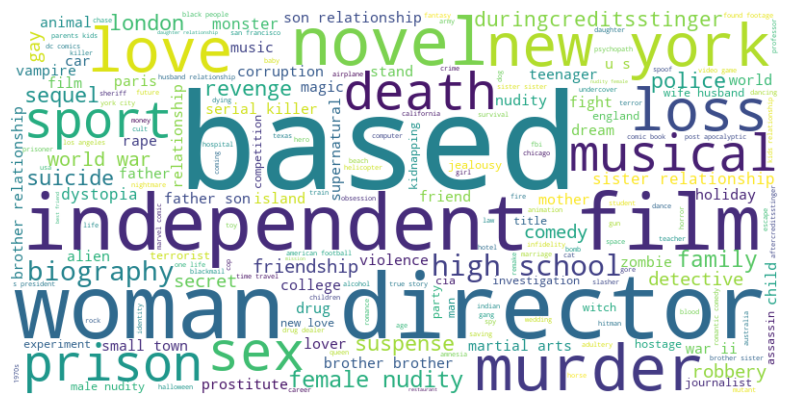

In [67]:
keyword_groups_appearences = df['keywords'].str.cat(sep='|')
keyword_groups_count = pd.Series(keyword_groups_appearences.split('|'))

keyword_appearences = keyword_groups_count.str.cat(sep=' ')
keyword_count = pd.Series(keyword_appearences.split(' '))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keyword_appearences)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

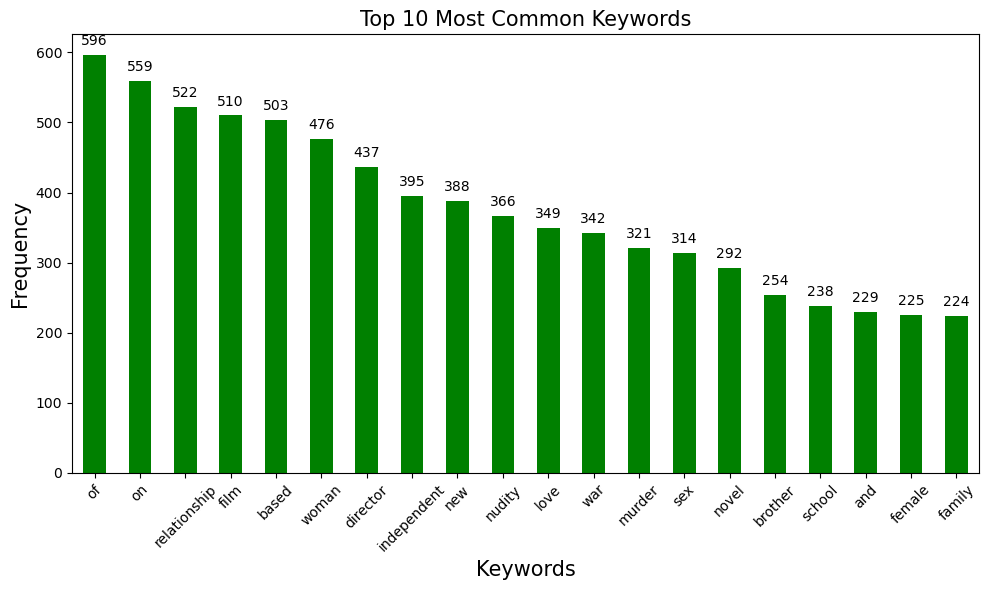

In [68]:
plt.figure(figsize=(10, 6))
top_keywords = keyword_count.value_counts()[:20]
ax = top_keywords.plot(kind='bar', color=['green'])
annotate_bars_with_numbers(ax)
plt.title('Top 10 Most Common Keywords',fontsize=15)
plt.xlabel('Keywords',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<strong>Average popularity per genre</strong>

<Figure size 1000x600 with 0 Axes>

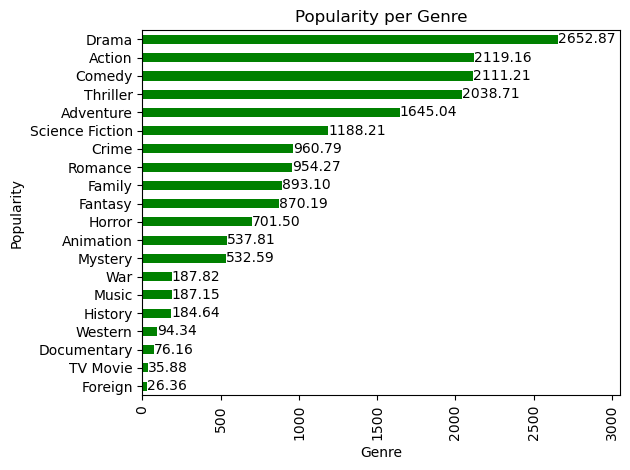

In [69]:
columns = list(df['genres'].str.split('|', expand=True).stack().unique())
genre_popularity = {genre: 0 for genre in columns}

for index, row in df.iterrows():
    genres = row['genres'].split('|')
    popularity = row['popularity']
    for column in columns:
        if column in genres:
            genre_popularity[column] += popularity
            
genre_popularity_df = pd.DataFrame(list(genre_popularity.items()), columns=['Genre', 'Popularity'])

genre_popularity_df = genre_popularity_df.sort_values(by='Popularity', ascending=True)

plt.figure(figsize=(10, 6))
ax = genre_popularity_df.plot(x='Genre', y='Popularity', kind='barh', color='green', legend=None)
plt.title('Popularity per Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=90)

for i, value in enumerate(genre_popularity_df['Popularity']):
        ax.text(value, i, f'{value:.{2}f}', va='center')

ax.set_xlim(0, genre_popularity_df['Popularity'].max() * 1.15)
plt.tight_layout()
plt.show()

<strong>Total revenue per genre</strong>

<Figure size 1000x600 with 0 Axes>

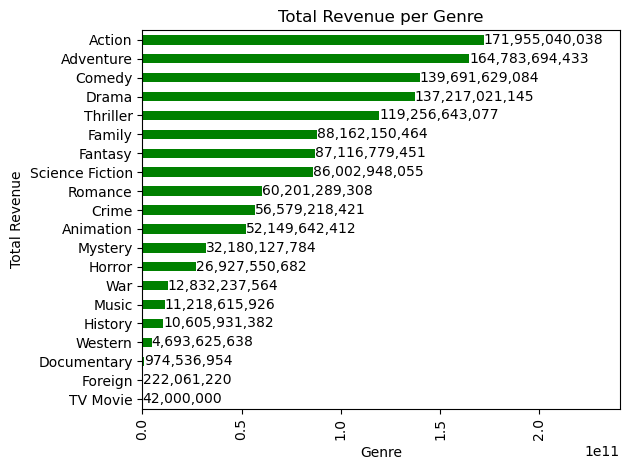

In [70]:
columns = list(df['genres'].str.split('|', expand=True).stack().unique())
genre_revenue = {genre: 0 for genre in columns}

for index, row in df.iterrows():
    genres = row['genres'].split('|')
    revenue = row['revenue']
    for column in columns:
        if column in genres:
            genre_revenue[column] += revenue
            
genre_revenue_df = pd.DataFrame(list(genre_revenue.items()), columns=['Genre', 'Total Revenue'])

genre_revenue_df = genre_revenue_df.sort_values(by='Total Revenue', ascending=True)

plt.figure(figsize=(10, 6))
ax = genre_revenue_df.plot(x='Genre', y='Total Revenue', kind='barh', color='green', legend=None)
plt.title('Total Revenue per Genre')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)

annotate_barsh_with_values(ax, genre_revenue_df)

ax.set_xlim(0, genre_revenue_df['Total Revenue'].max() * 1.4)
plt.tight_layout()
plt.show()

<strong>Average votes for movies released before 2000</strong>

In [76]:
new_df = df[df['release_year'] < 2000]
movie_count = new_df.shape[0]
vote_average_sum = new_df['vote_average'].sum()

average_vote_average = vote_average_sum / movie_count

average_vote_average

6.110783463428737

<strong>Visualization of movie releases over the years</strong>

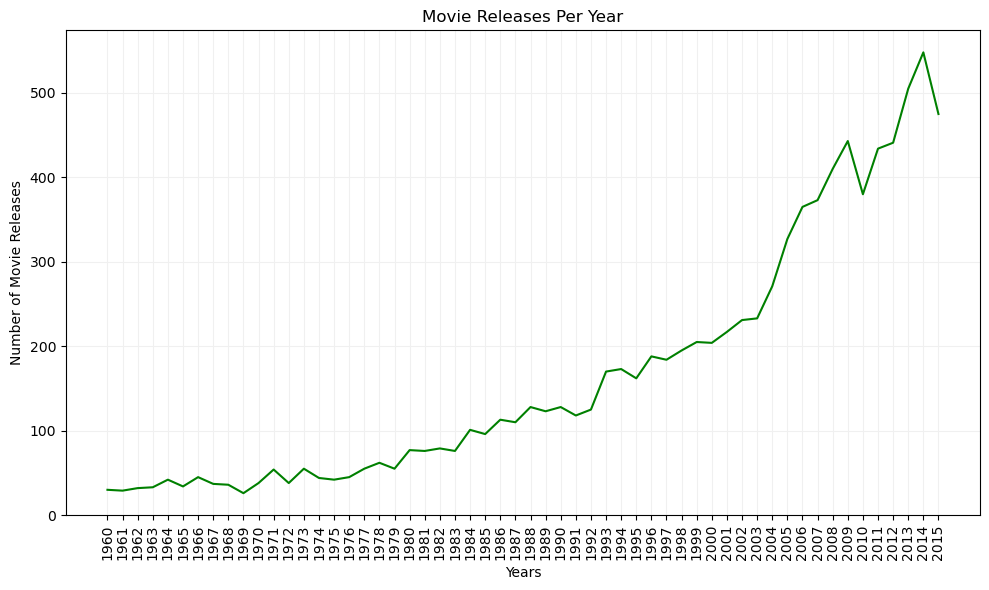

1960     30
1961     29
1962     32
1963     33
1964     42
1965     34
1966     45
1967     37
1968     36
1969     26
1970     38
1971     54
1972     38
1973     55
1974     44
1975     42
1976     45
1977     55
1978     62
1979     55
1980     77
1981     76
1982     79
1983     76
1984    101
1985     96
1986    113
1987    110
1988    128
1989    123
1990    128
1991    118
1992    125
1993    170
1994    173
1995    162
1996    188
1997    184
1998    195
1999    205
2000    204
2001    217
2002    231
2003    233
2004    271
2005    327
2006    365
2007    373
2008    410
2009    443
2010    380
2011    434
2012    441
2013    505
2014    548
2015    475
Name: release_year, dtype: int64

In [77]:
movie_count_per_year = df['release_year'].value_counts()

movie_count_per_year = movie_count_per_year.sort_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(movie_count_per_year.index, movie_count_per_year, color='green')
plt.title('Movie Releases Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Movie Releases')
plt.grid(True,color='#f0f0f0')
plt.xticks(movie_count_per_year.index, rotation=90)

plt.tight_layout()
plt.show()

<strong>Best movie runtime based on movie popularity</strong>

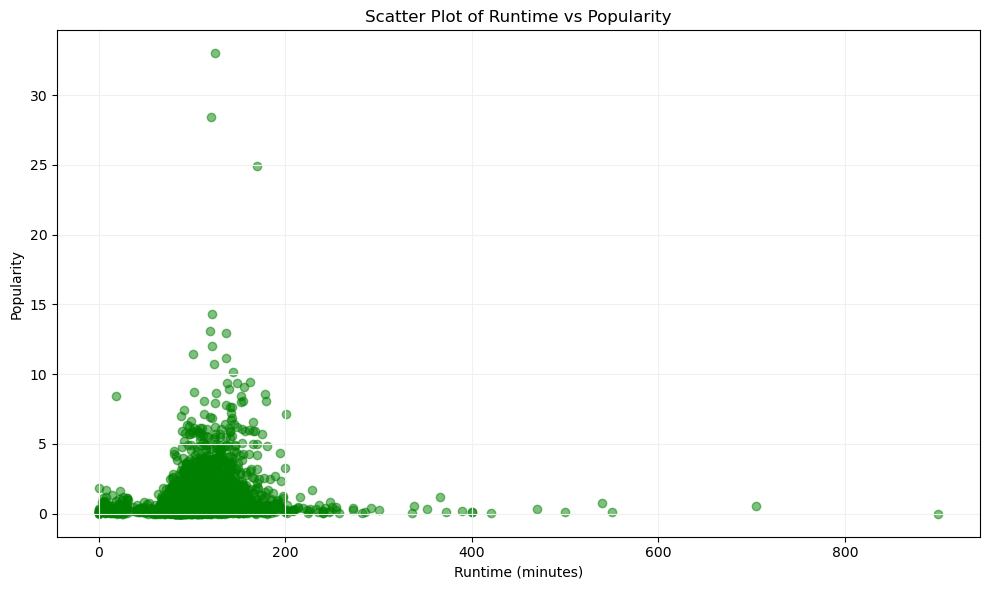

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime'], df['popularity'], alpha=0.5,color='green')
plt.title('Scatter Plot of Runtime vs Popularity')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Popularity')
plt.grid(True,color='#f0f0f0')
plt.tight_layout()
plt.show()

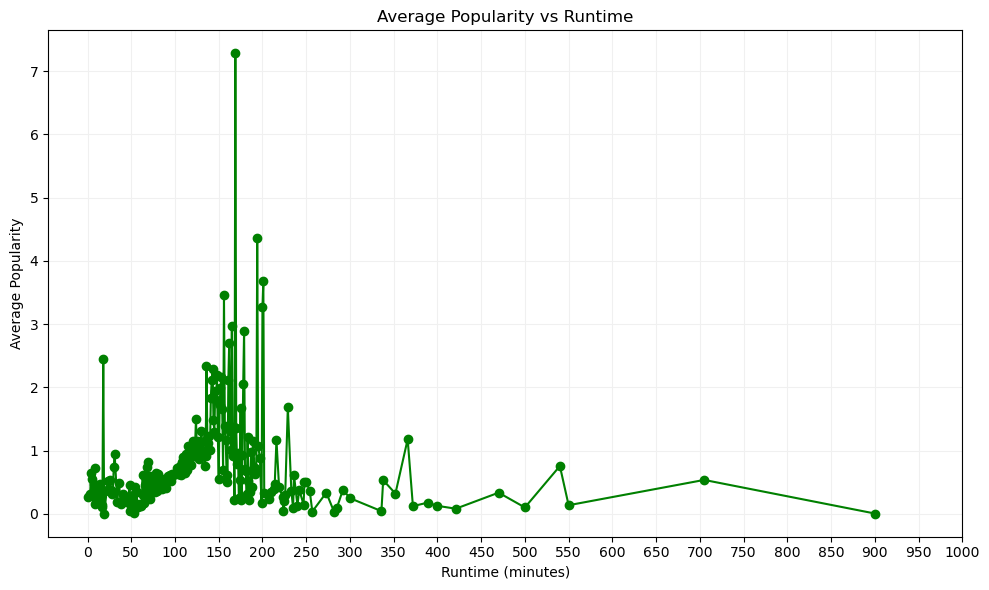

In [33]:
runtime_popularity = df.groupby('runtime')['popularity'].mean()

plt.figure(figsize=(10, 6))
plt.plot(runtime_popularity.index, runtime_popularity, marker='o', color='green')
plt.title('Average Popularity vs Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Popularity')
plt.grid(True,color='#f0f0f0')

# Set custom x-axis ticks and labels up to 1000 with intervals of 50
custom_ticks = list(range(0, 1001, 50))
plt.xticks(custom_ticks)

plt.tight_layout()
plt.show()

<strong>Correlation between movie budget and revenue</strong>

In [34]:
budget_revenue_correlation = df['budget'].corr(df['revenue'])

budget_revenue_correlation

0.732284821989621

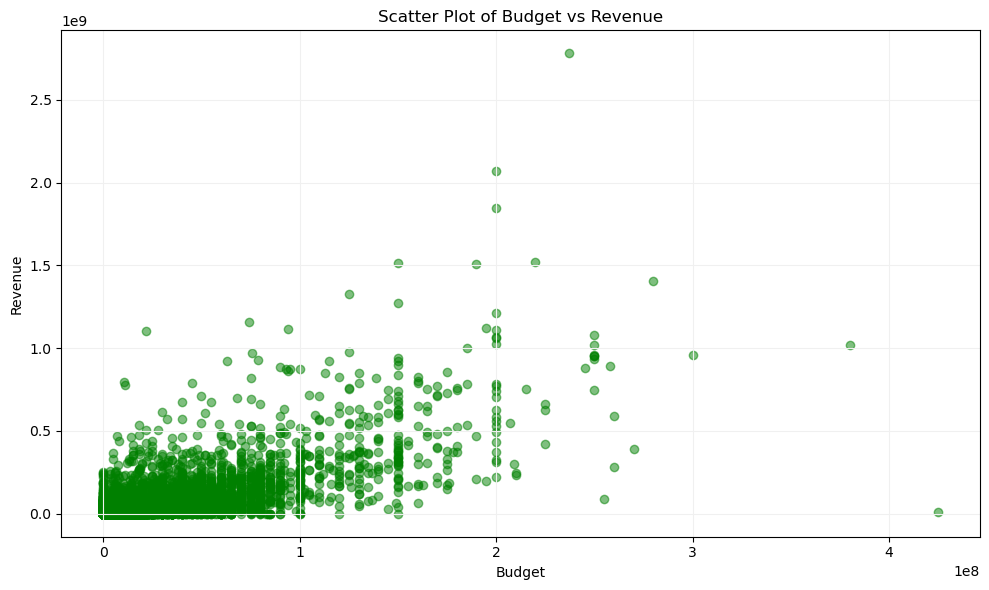

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5, color='green')
plt.title('Scatter Plot of Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True,color='#f0f0f0')
plt.tight_layout()
plt.show()

<strong>Correlation between average ratings vs reveneu generated</strong>

In [36]:
vote_average_revenue_correlation = df['vote_average'].corr(df['revenue'])

vote_average_revenue_correlation

0.18407382887059423

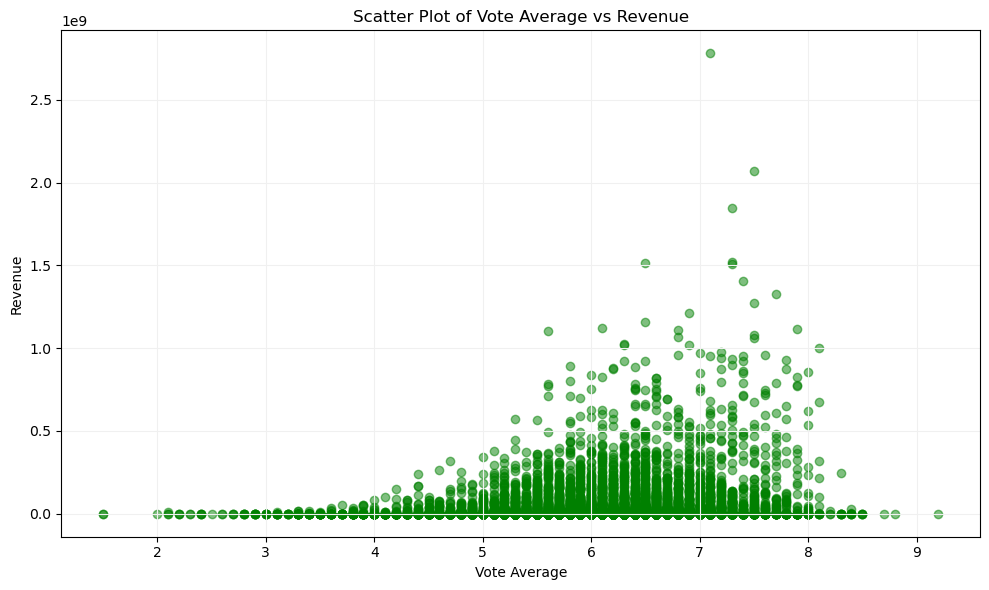

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df['vote_average'], df['revenue'], alpha=0.5, color='green')
plt.title('Scatter Plot of Vote Average vs Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.grid(True,color='#f0f0f0')
plt.tight_layout()
plt.show()

### <a id="results-and-findings">Results and Findings</a>

In this section, I present a summary of my findings based on the earlier presented questions.

<strong>Which year had the highest release of movies?</strong>

With 548 movies, the year of 2014 had the highest number of movies released.


<strong>Which genre had the highest release of movies?</strong>

With 4202 movies, the Drama genre had the highest release of movies.

<strong>Which 10 actors are casted the most?</strong>

The 10 most casted actors were:
- Robert De Niro (68)
- Samuel L. Jackson (66)
- Bruce Willis (61)
- Nicolas Cage (59)
- Michael Caine (51)
- Robin Williams (48)
- John Cusack (48)
- Morgan Freeman (47)
- John Goodman (47)
- Tom Hanks (46)

<strong>Identify the keywords that appear most frequently in movie descriptions.</strong>

The 20 most frequent keywords in movie descriptions were:

- of (596)
- on (559)
- relationship (522)
- film (510)
- based (503)
- woman (476)
- director (437)
- independent (395)
- new (388)
- nudity (366)
- love (349)
- war (342)
- murder (321)
- sex (314)
- novel (292)
- brother (254)
- school (238)
- and (229)
- female (225)
- family (224)

<strong>Calculate the average popularity for each genre category.</strong>

The average popularity for each genre is:
- Foreign (26.359119)
- TV Movie (35.880124)
- Documentary (76.162002)
- Western (94.339207)
- History (184.640632)
- Music (187.150996)
- War (187.815465)
- Mystery (532.589243)
- Animation (537.807912)
- Horror (701.500568)
- Fantasy (870.185289)
- Family (893.095865)
- Romance (954.273170)
- Crime (960.792390)
- Science Fiction (1188.206821)
- Adventure (1645.036932)
- Thriller (2038.714998)
- Comedy (2111.209552)
- Action (2119.163279)
- Drama (2652.874417)

<strong>Calculate the total revenue for each genre category.</strong>

The total revenue per genre was:
- Action (171,955,040,038)
- Adventure (164,783,694,433)
- Comedy (139,691,629,084)
- Drama (137,217,021,145)
- Thriller (119,256,643,077)
- Family (88,162,150,464)
- Fantasy (87,116,779,451)
- Science Fiction (86,002,948,055)
- Romance (60,201,289,308)
- Crime (56,579,218,421)
- Animation (52,149,642,412)
- Mystery (32,180,127,784)
- Horror (26,927,550,682)
- War (12,832,237,564)
- Music (11,218,615,926)
- History (10,605,931,382)
- Western (4,693,625,638)
- Documentary (974,536,954)
- Foreign (222,061,220)
- TV Movie (42,000,000)

<strong>Calculate the average vote average for movies released before the year 2000.</strong>

The average vote average for movies released before 2000 is 6.110783463428737.

<strong>Perform a time series analysis of movie releases and visualize the trend over the years.</strong>
- 2015 (475)
- 2014 (548)
- 2013 (505)
- 2012 (441)
- 2011 (434)
- 2010 (380)
- 2009 (443)
- 2008 (410)
- 2007 (373)
- 2006 (365)
- 2005 (327)
- 2004 (271)
- 2003 (233)
- 2002 (231)
- 2001 (217)
- 2000 (204)
- 1999 (205)
- 1998 (195)
- 1997 (184)
- 1996 (188)
- 1995 (162)
- 1994 (173)
- 1993 (170)
- 1992 (125)
- 1991 (118)
- 1990 (128)
- 1989 (123)
- 1988 (128)
- 1987 (110)
- 1986 (113)
- 1985 (96)
- 1984 (101)
- 1983 (76)
- 1982 (79)
- 1981 (76)
- 1980 (77)
- 1979 (55)
- 1978 (62)
- 1977 (55)
- 1976 (45)
- 1975 (42)
- 1974 (44)
- 1973 (55)
- 1972 (38)
- 1971 (54)
- 1970 (38)
- 1969 (26)
- 1968 (36)
- 1967 (37)
- 1966 (45)
- 1965 (34)
- 1964 (42)
- 1963 (33)
- 1962 (32)
- 1961 (29)
- 1960 (30)

<strong>Which length (runtime) is suits viewers most based on movie popularity?</strong>

Movies with a runtime between 150 to 200 minutes were the most popular.

<strong>What is the correlation between movies’ budgets and their revenue?</strong>

The correlation coefficient of 0.732 suggests a strong positive linear relationship between movies' budgets and their revenues. This indicates that as the budget of a movie increases, its revenue tends to increase as well.

<strong>What is the correlation between average ratings and revenue generated?</strong>

The correlation coefficient of 0.184 suggests a relatively weak positive linear relationship between average ratings and revenue. This means that, on average, higher ratings tend to be associated with higher revenues, and lower ratings tend to be associated with lower revenues. However, the strength of this relationship is not very substantial, as indicated by the relatively low correlation coefficient.


### <a id="references-and-resources">References and Resources</a>

- [Python](https://www.python.org/)
- [Jupyter Notebook](https://jupyter.org/)
- [Anaconda](https://www.anaconda.com/)
- [VS Code](https://code.visualstudio.com/)
- [NumPy](https://numpy.org/)
- [Pandas](https://pandas.pydata.org/)
- [Matplotlib](https://matplotlib.org/)
- [Wordcloud](https://github.com/amueller/word_cloud)
- [TMDB](https://www.themoviedb.org/)